In [45]:
# Importing all the necessary libraries to achieve linear regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
# Load our Salary_dataset.csv and convert them into input and actual output
my_data = np.genfromtxt("Salary_dataset.csv", skip_header=1, usecols=(1,2), dtype=[int, float, float], delimiter=',')
X_train = np.fromiter((tup[0] for tup in my_data), dtype=float) # X_train contains just a single feature ie., Years of Experience 
Y_train = np.fromiter((tup[1] for tup in my_data), dtype=float) # Y_train contains the actual output for the given input

In [ ]:
# Description of our data
print(f"Shape of X_train: {np.shape(X_train)}")
print(f"Shape of Y_train: {np.shape(Y_train)}")
print(f"Number of training examples (m): {len(X_train)}")

Shape of X_train: (30,)
Shape of Y_train: (30,)
Number of training examples (m): 30


In [ ]:
# Due to huge variation in the values of input and output, I have decided to scale the features
# I have used a basic and general scaling (dividing by maximum value in the array)
X_max= X_train.max()
Y_max = Y_train.max()
Norm_x_train = np.zeros(len(X_train))
Norm_y_train = np.zeros(len(Y_train))
for i in range(len(X_train)):
    Norm_x_train[i] = X_train[i]/X_max
    Norm_y_train[i] = Y_train[i]/Y_max

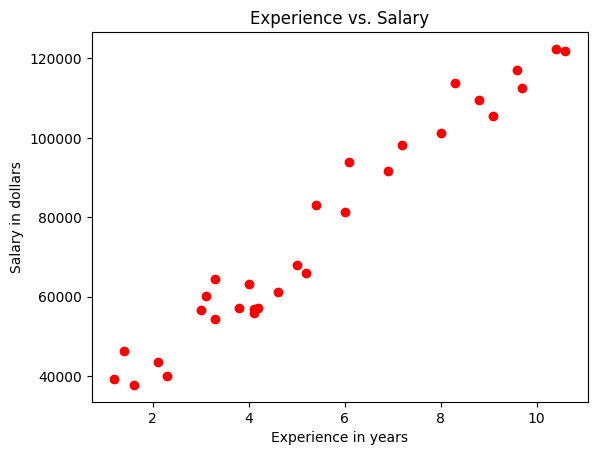

In [ ]:
# Plot our X_train and Y_train values in a graph to visualize data
plt.scatter(X_train, Y_train, c='r') 
plt.title("Experience vs. Salary")
plt.xlabel('Experience in years')
plt.ylabel('Salary in dollars')
plt.show()

In [ ]:
# Calculate the cost function. Here we are using Squared error cost
def SquaredErrorCost(x, y, w, b): # Takes 4 parameters x(input), y(output), w(parameter), b(parameter)
    m = len(x)
    j_wb = 0
    # I decided to go with regular implementation rather than vectorized implementation
    for i in range(m):
        f_wb_i = (w * x[i]) + b
        j_wb_i = (f_wb_i - y[i])**2
        j_wb += j_wb_i # Overall loss calculation
    return j_wb/(2*m) # returns cost


In [ ]:
# We compute the derivative value in gradient descent
# We compute gradient descent in 2 parts. This is part 1
def gradient(x, y, w, b):
    m = len(x)
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = (w * x[i]) + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_dw += dj_dw_i
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
    return dj_dw/m, dj_db/m 


In [ ]:
# Part 2 of the gradient descent
# Here we include alpha and we run the number of epochs or iterations we specify
def GradientDescent(x, y, w_in, b_in, alpha, no_iter):
    w = w_in
    b = b_in
    for i in range(no_iter):
        dj_dw, dj_db = gradient(x, y, w, b)
        
        w = w - (alpha*dj_dw)
        b = b - (alpha*dj_db)

        cost = SquaredErrorCost(x, y, w, b)
        if i%10==0:
            print(f"iteration: {i}    cost: {cost:8.2f}")
    return w, b


In [ ]:
# To predict a certain value we call this function
def Prediction(x, w, b):
    if type(x) is float or int:
        predicted = w * x + b
    else:
        m = len(x)
        predicted = np.zeros(m)
        for i in range(m):
            predicted[i] = w*x[i]+b
    return predicted

In [ ]:
# Actual training of the model and getting the weights w and b
w, b = GradientDescent(Norm_x_train, Norm_y_train, 0, 0, 0.01, 10500)
m = len(Norm_x_train)
predicted = Prediction(Norm_x_train, w, b)

iteration: 0    cost:     0.21
iteration: 10    cost:     0.17
iteration: 20    cost:     0.13
iteration: 30    cost:     0.10
iteration: 40    cost:     0.08
iteration: 50    cost:     0.07
iteration: 60    cost:     0.05
iteration: 70    cost:     0.04
iteration: 80    cost:     0.04
iteration: 90    cost:     0.03
iteration: 100    cost:     0.03
iteration: 110    cost:     0.02
iteration: 120    cost:     0.02
iteration: 130    cost:     0.02
iteration: 140    cost:     0.02
iteration: 150    cost:     0.01
iteration: 160    cost:     0.01
iteration: 170    cost:     0.01
iteration: 180    cost:     0.01
iteration: 190    cost:     0.01
iteration: 200    cost:     0.01
iteration: 210    cost:     0.01
iteration: 220    cost:     0.01
iteration: 230    cost:     0.01
iteration: 240    cost:     0.01
iteration: 250    cost:     0.01
iteration: 260    cost:     0.01
iteration: 270    cost:     0.01
iteration: 280    cost:     0.01
iteration: 290    cost:     0.01
iteration: 300    cos

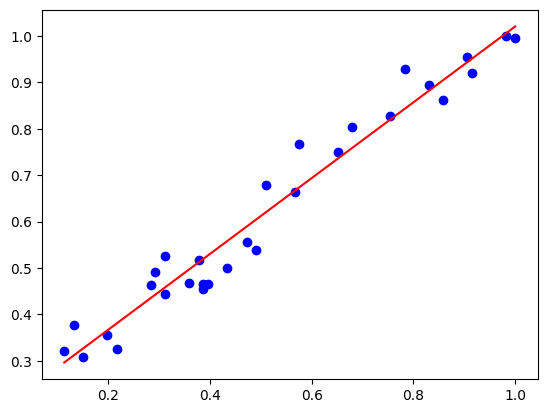

In [ ]:
# Plotting our model and actual predictions for visualization purposes
plt.plot(Norm_x_train, predicted, c = 'r')
plt.scatter(Norm_x_train, Norm_y_train, c='b')

In [39]:
# custom predictions
x = 1.6
pred2 = Prediction(x/X_max, w, b)
print(f"Workig for {x} year my salary would likely be {pred2*Y_max}")

Workig for 1.6 year my salary would likely be 40055.224765450526


In [ ]:
# we achieved an r2 score of 0.9968296864751057
y_true = [122392.0, 121873.0, 37732.0] 
y_pred = [123029.0848, 124914.8543757901, 40055.224765450526] 
r2 = r2_score(y_true, y_pred)
print(r2)

0.9968296864751057
